In [130]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [176]:
# Load CSV file
csv_file = 'MPC_results_2025-01-28.csv'  # Replace with your file name

# Read the CSV file
data = pd.read_csv(csv_file)

    # Check for required columns
fuel_consumption_per_timestep = data['Fuel Consumption'].values * 0.1  # liters per time step
travel_distance = data['Travel Distance'].values  # meters
velocity = data['Current Velocity'].values  # Assuming velocity is in km/h
acceleration = data['Acceleration'].values  # Assuming acceleration is in km/h²
cal_acceleration = data['Calculated Acceleration'].values  # Assuming acceleration is in km/h²
time = data['Timestamp'].values
print('Time array:', time.size)
cumulative_fuel_consumption = np.cumsum(fuel_consumption_per_timestep)  # Cumulative fuel consumption

Time array: 724


vehicle_25_20250128_202015.csv
vehicle_26_20250128_202015.csv
vehicle_27_20250128_202015.csv
vehicle_28_20250128_202015.csv
vehicle_29_20250128_202015.csv


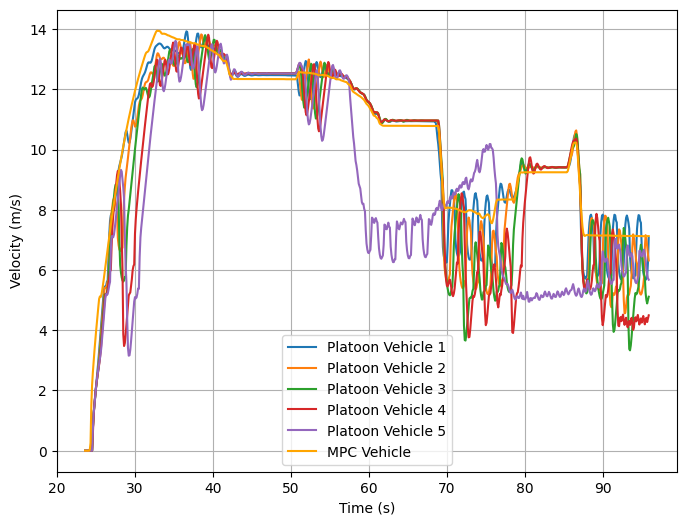

In [177]:
import glob

csv_files = glob.glob("vehicle*.csv")
counter = 0
plt.figure(figsize=(8, 6))
for file in sorted(csv_files):
    counter = counter +1
    print(file)
    df = pd.read_csv(file)
    vehicle_id = file.split('_')[1]  # Extract vehicle ID from the file name
    plt.plot(df["Time"], df["Velocity"], label=f'Platoon Vehicle {counter}')
# plt.plot(df["Time"], df["Reference Velocity"], label=f'Vehicle {vehicle_id} Ref Velocity')

plt.plot(time, velocity, label='MPC Vehicle', color='orange')
plt.legend()
plt.grid()
# plt.xlim(0, 135)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


vehicle_25_20250128_202015.csv
vehicle_26_20250128_202015.csv
vehicle_27_20250128_202015.csv
vehicle_28_20250128_202015.csv
vehicle_29_20250128_202015.csv


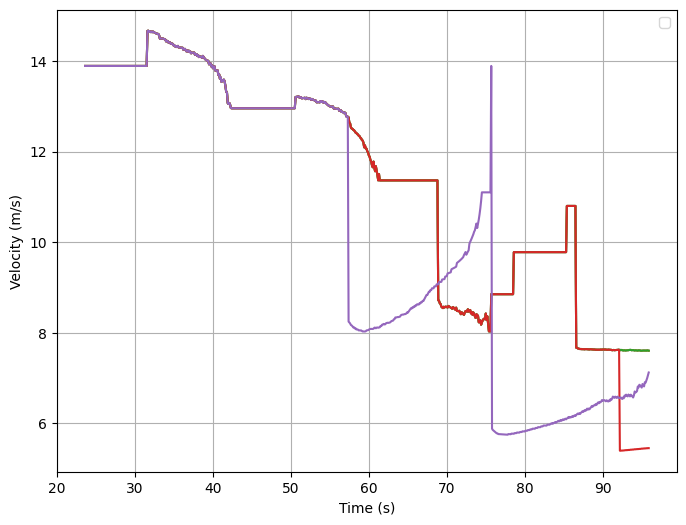

In [178]:
plt.figure(figsize=(8, 6))
for file in sorted(csv_files):
    counter = counter +1
    print(file)
    df = pd.read_csv(file)
    vehicle_id = file.split('_')[1]  # Extract vehicle ID from the file name
    plt.plot(df["Time"], df["Reference Velocity"])
# plt.plot(df["Time"], df["Reference Velocity"], label=f'Vehicle {vehicle_id} Ref Velocity')

# plt.plot(time, velocity, label='MPC Vehicle', color='orange')
plt.legend()
plt.grid()
# plt.xlim(0, 135)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.show()

vehicle_25_20250128_202015.csv
vehicle_26_20250128_202015.csv
vehicle_27_20250128_202015.csv
vehicle_28_20250128_202015.csv
vehicle_29_20250128_202015.csv


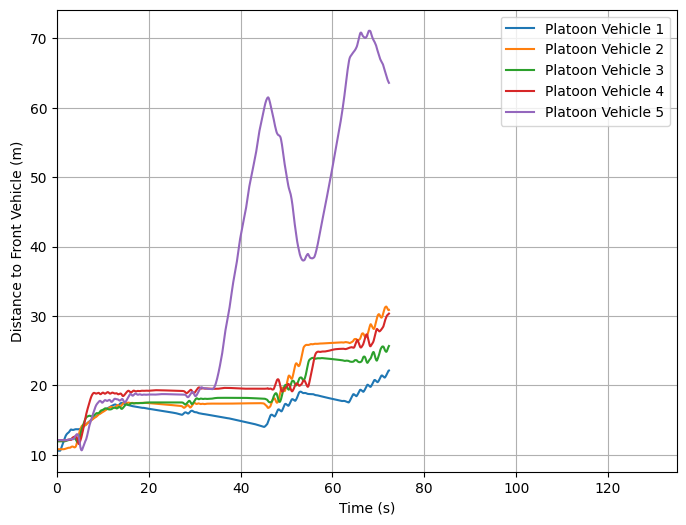

In [179]:
counter = 0
plt.figure(figsize=(8, 6))
for file in sorted(csv_files):
    counter = counter +1
    print(file)
    df = pd.read_csv(file)
    vehicle_id = file.split('_')[1]  # Extract vehicle ID from the file name
    plt.plot(df["Time"]-df["Time"].iloc[0], df["Distance to Front Vehicle"], label=f'Platoon Vehicle {counter}')
# plt.plot(df["Time"], df["Reference Velocity"], label=f'Vehicle {vehicle_id} Ref Velocity')
plt.xlim(0, 135)
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Distance to Front Vehicle (m)")
plt.show()

In [ ]:
# Plot velocity vs. time
df_2 = pd.read_csv(csv_files[2])
print(csv_files)
plt.figure(figsize=(10, 6))
# plt.plot(time, velocity, label='Velocity (m/s)', color='blue')
plt.plot(time[0:len(df_2['Reference Velocity'])], df_2['Reference Velocity'][0:len(time)], label='Ref Velocity (m/s)', color='red')
# plt.plot(time, acceleration, label='Acceleration (m/s²)', color='red')
# plt.plot(time, data['Calculated Acceleration'].values, label='Calculated Acceleration (m/s²)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')
plt.legend()
plt.grid(True)
plt.show()


['vehicle_27_20250128_183150.csv', 'vehicle_29_20250128_183151.csv', 'vehicle_25_20250128_183150.csv', 'vehicle_26_20250128_183150.csv', 'vehicle_28_20250128_183150.csv']


NameError: name 'lt' is not defined

<Figure size 1000x600 with 0 Axes>

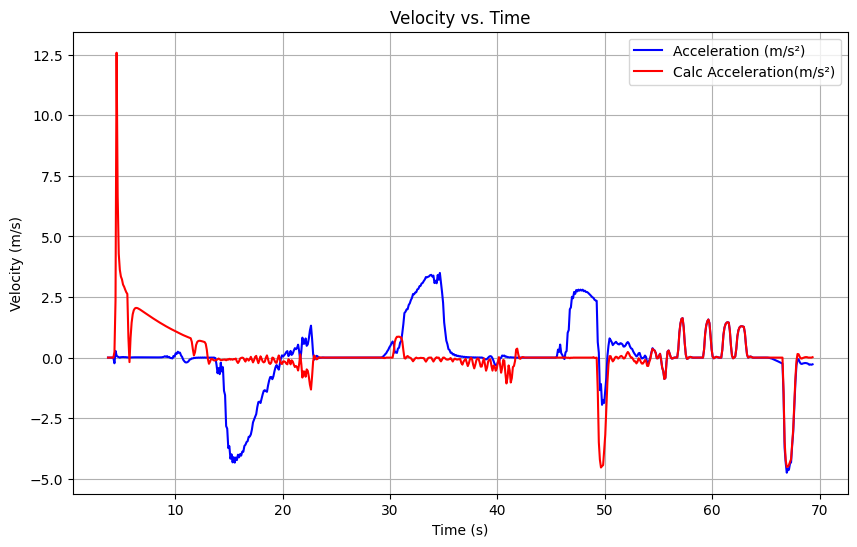

In [158]:
# Plot velocity vs. time
plt.figure(figsize=(10, 6))
plt.plot(time[0:len(acceleration)], acceleration, label='Acceleration (m/s²)', color='blue')
# plt.plot(time, acceleration, label='Acceleration (m/s²)', color='red')
plt.plot(time[0:len(acceleration)], cal_acceleration, label='Calc Acceleration(m/s²)', color='red')
# plt.plot(time, data['Calculated Acceleration'].values, label='Calculated Acceleration (m/s²)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
for file in csv_files:
    df = pd.read_csv(file)
    # Calculate the time difference between consecutive steps
    df['Time_diff'] = df['Time'].diff().fillna(0)

    # Calculate the distance traveled in each step
    df['Distance_step'] = df['Velocity'] * df['Time_diff']

    # Calculate the cumulative distance
    df['Distance_cumulative'] = df['Distance_step'].cumsum()

    # Calculate the acceleration
    df['Acceleration'] = df['Velocity'].diff().fillna(0) / df['Time_diff']

    # Drop temporary calculation columns if you don't want them in the output
    df = df.drop(columns=['Time_diff', 'Distance_step'])

    # Save the updated data back to the same file with the acceleration column
    df.to_csv(file, index=False)
    

['vehicle_33_20250128_195949.csv', 'vehicle_34_20250128_195949.csv', 'vehicle_32_20250128_195949.csv', 'vehicle_35_20250128_195949.csv', 'vehicle_36_20250128_195949.csv']
vehicle_32_20250128_195949.csv -12
vehicle_33_20250128_195949.csv -24
vehicle_34_20250128_195949.csv -36
vehicle_35_20250128_195949.csv -48
vehicle_36_20250128_195949.csv -60


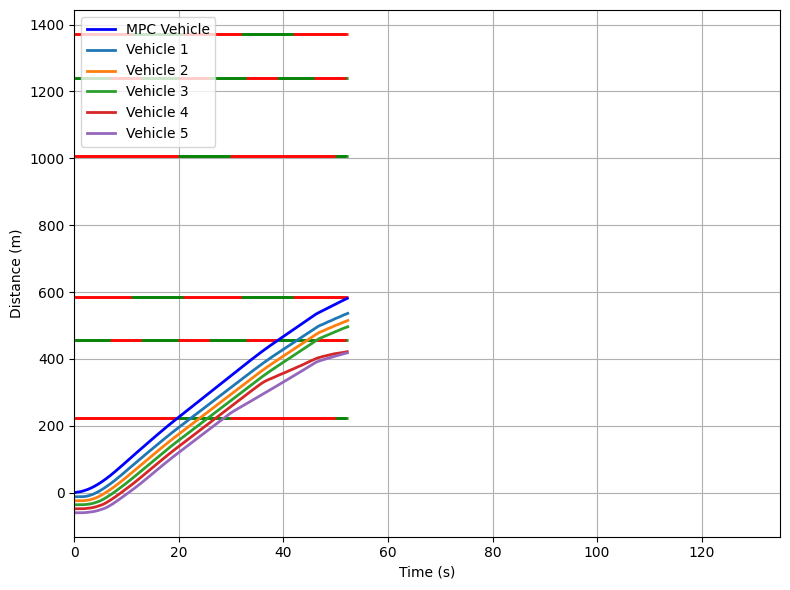

In [166]:
# Define traffic light positions
traffic_lights = {
    13: 224,  # Traffic light 13 at 223m
    11: 456,  # Traffic light 11 at 455m
    20: 585,  # Traffic light 20 at 585m
    13 + 100: 224 + 784,  # Traffic light 13 at 949m (second round)
    11 + 100: 456 + 784,  # Traffic light 11 at 1181m (second round)
    20 + 100: 588 + 784   # Traffic light 20 at 1311m (second round)
}
 
# Extract relevant data from the CSV
timestamp = data['Timestamp']  # Use tick number for the timeline
travel_distance = data['Travel Distance']  # Replace with correct column for travel distance
 
# Traffic light states (replace with actual column names)
tl_states = {
    13: data['Light State 13'],  # Replace with the correct column name for Traffic Light 13
    11: data['Light State 11'],  # Replace with the correct column name for Traffic Light 11
    20: data['Light State 20'],  # Replace with the correct column name for Traffic Light 20
    13 + 100: data['Light State 13'],  # Second round, same states
    11 + 100: data['Light State 11'],  # Second round, same states
    20 + 100: data['Light State 20']   # Second round, same states
}
 
# Convert ticks to time starting from zero
time = (timestamp - timestamp.iloc[0])  # Subtract initial tick value and multiply by 0.1s
# Plot setup
fig=plt.figure(figsize=(8, 6))
 
# Plot traffic light phases
for tl_id, position in traffic_lights.items():
    states = tl_states[tl_id]
    for i in range(len(states) - 1):
        start_time = time.iloc[i]
        end_time = time.iloc[i + 1]
        color = 'red' if states.iloc[i] == 'Red' else 'green'
        plt.plot([start_time, end_time], [position, position], color=color, linewidth=2, alpha=0.6)
 
# Plot ego vehicle trajectory
plt.plot(time, travel_distance, color='blue', label=f'MPC Vehicle',linewidth=2)
print(csv_files)

other_vehicles_start_point=[-12*(i+1) for i in range(len(csv_files))]

counter=0
 # Loop through each CSV file and plot the data
for file, start_y in zip(sorted(csv_files),other_vehicles_start_point):
    counter = counter + 1
    print(file, start_y)
    # Read the CSV file
    df = pd.read_csv(file)
    vehicle_id = file.split('_')[1]  # Extract vehicle ID from the file name
    # Ensure the CSV has the required columns
    if 'Distance_cumulative' not in df.columns:
        raise ValueError(f"File {file} does not contain 'Distance_cumulative' column.")

    # Calculate the adjusted Y positions (cumulative distance + starting position)
    adjusted_y = df['Distance_cumulative'] + start_y
    time = df['Time'] - df['Time'].iloc[0]  # Adjust time starting from zero

    # Plot the data
    plt.plot(time, adjusted_y, label=f'Vehicle {counter}', linewidth=2)
# Add labels and legends
plt.xlabel('Time (s)')  # Time on x-axis, starting from zero
plt.ylabel('Distance (m)')  # Position on y-axis
plt.xlim(0, 135)  # Limit the x-axis to 100 seconds
# plt.title('Space-Time Diagram for Traffic Lights and Ego Vehicle')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('No_plit.png')
plt.show()


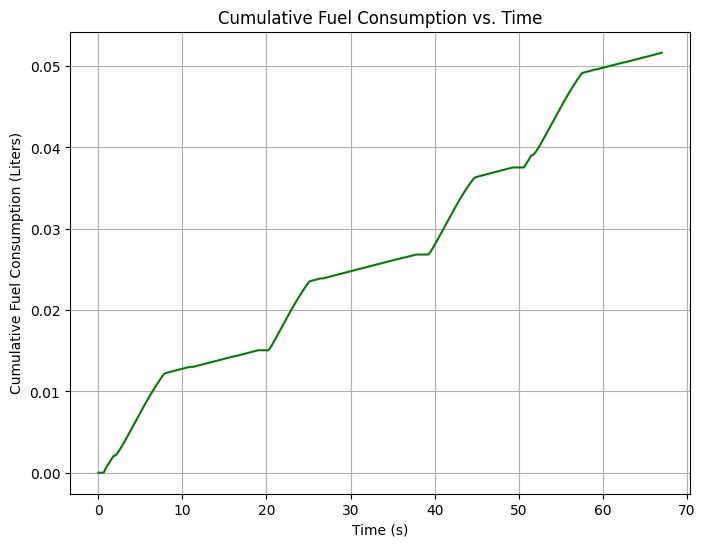

In [101]:

fig = plt.figure(figsize=(8, 6))
plt.plot(time[0:len(cumulative_fuel_consumption)], cumulative_fuel_consumption, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Fuel Consumption (Liters)')
plt.title('Cumulative Fuel Consumption vs. Time')

# # Extract the last points
# final_time = time[-1]
# final_cfc = cumulative_fuel_consumption[-1]

# # Annotate the last values
# plt.text(final_time, final_cfc, f'{final_cfc:.2f} L', 
#          fontsize=10, color='green', 
#          ha='right', va='bottom')

plt.grid(True)
plt.show()


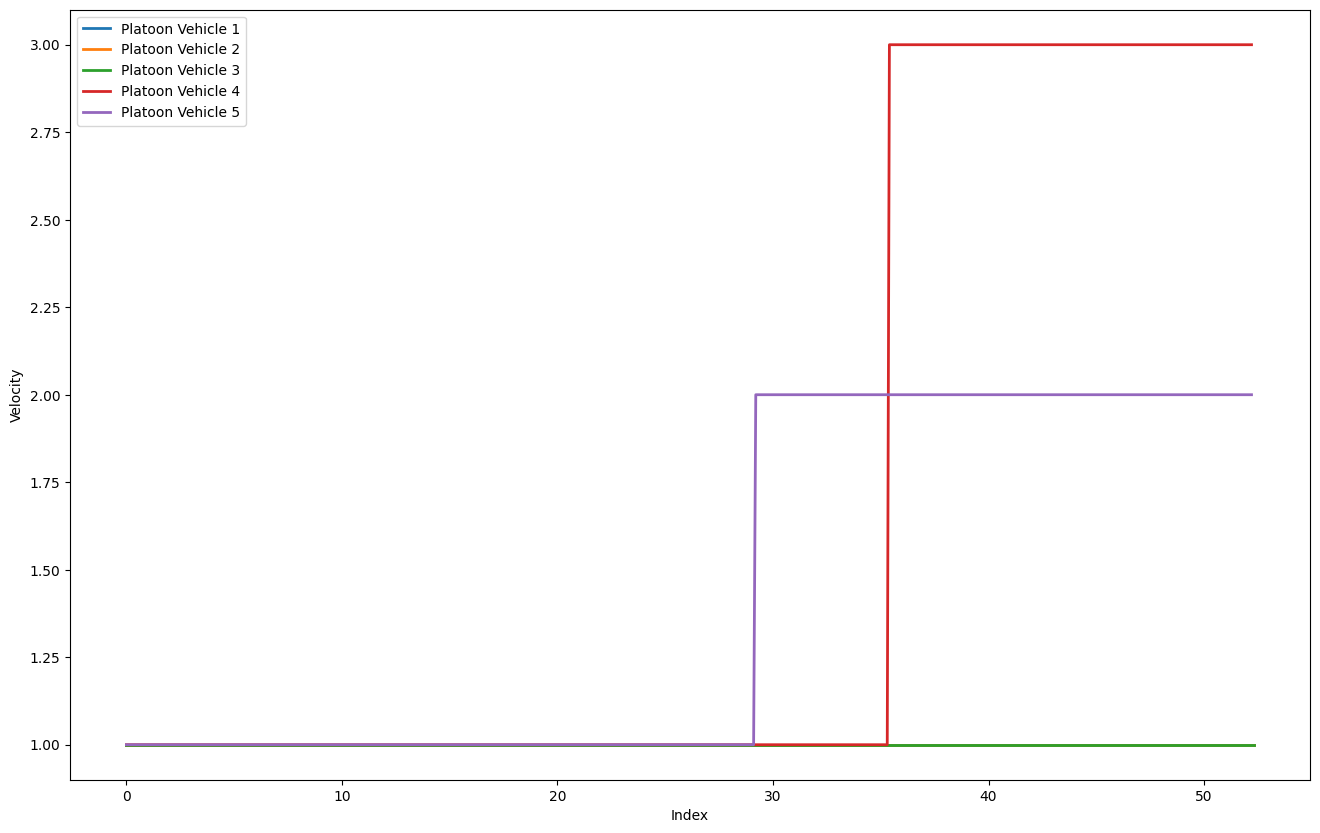

In [167]:
csv_files = glob.glob("vehicle*.csv")
plt.figure(figsize=(16, 10))
counter=0
for file in sorted(csv_files):
    df = pd.read_csv(file)
    counter = counter + 1
    plt.plot(df["Time"]-df["Time"][0],df["Platoon ID"], label=f'Platoon Vehicle {counter}', linewidth=2)
plt.legend()
plt.xlabel("Index")
plt.ylabel("Velocity")
plt.show()

In [94]:
def calculate_fuel_consumption(v, u):
    """
    Calculate the fuel consumption considering physical parameters and net acceleration.

    Parameters:
    v (float): Vehicle speed (m/s)
    u (float): Commanded acceleration from MPC (m/s^2)

    Returns:
    float: Fuel consumption (L/s)
    """
    # Physical parameters
    M_h = 1500.0   # mass of the vehicle in kg (example)
    C_D = 0.3      # Drag coefficient (example)
    A_v = 2.2      # Frontal area in m^2 (example)
    mu = 0.01      # Rolling resistance coefficient (example)
    g = 9.81       # Gravity (m/s^2)
    rho_a = 1.225  # Air density (kg/m^3)
    theta = 0.0    # No slope

    # Fuel consumption polynomial coefficients
    # These coefficients are example values and should be tuned per vehicle/engine data
    b0, b1, b2, b3 = 0.1569, 0.02450, -0.0007415, 0.00005975
    c0, c1, c2 = 0.07224, 0.09681, 0.001075
    idle_fuel_rate = 0.1 / 3600  # L/s when idling (example)
    # Compute net acceleration (a_net)
    
    a_drag = (0.5 * C_D * rho_a * A_v * v**2) / M_h
    a_roll = mu * g
    a_net = u - a_drag - a_roll  # slope-free scenario
    #print('Drag and Rolling ressistance:',a_drag,a_roll)

    # Cruising fuel consumption rate
    f_cruise = b0 + b1*v + b2*(v**2) + b3*(v**3)

    # Acceleration fuel consumption rate
    f_accel = a_net * (c0 + c1*v + c2*(v**2))

    # Determine idle/braking condition ζ
    # ζ = 1 if v ≈ 0 or u < 0, else 0
    zeta = 1 if (np.isclose(v, 0, atol=1e-3) or u < 0) else 0

    fuel_consumption = (1 - zeta) * (f_cruise + f_accel) + zeta * idle_fuel_rate

    return fuel_consumption/1000, a_net  # Import the utils.py file


In [96]:
# Iterate through each CSV file
csv_files = glob.glob("vehicle*.csv")
for file in csv_files:
    df = pd.read_csv(file)

    # Calculate fuel consumption for each row
    df['Fuel_Consumption'], _ = zip(*df.apply(lambda row: calculate_fuel_consumption(row['Velocity'], row['Acceleration']), axis=1))
    
    # Save the updated data back to the same file with the new columns
    df.to_csv(file, index=False)


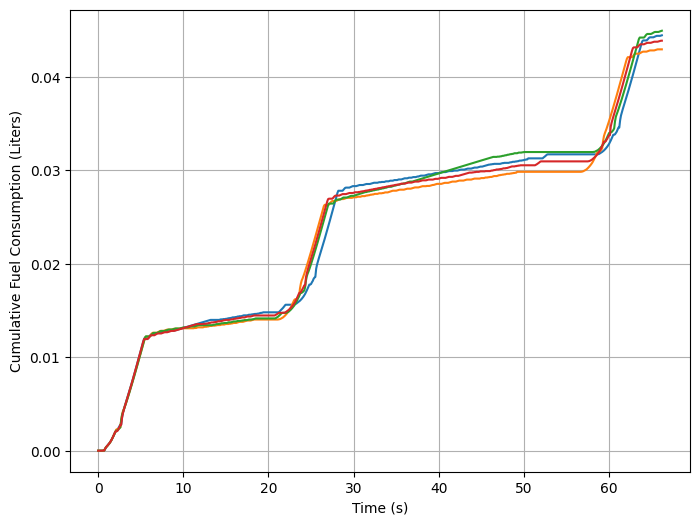

In [98]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_files = glob.glob("vehicle*.csv")
fig = plt.figure(figsize=(8, 6))
for file in csv_files:
    df = pd.read_csv(file)
    time_vehicle = df['Time'] - df['Time'].iloc[0]  # Adjust time starting from zero
    fuel_consumption_per_timestep_vehicle = df['Fuel_Consumption'].values * 0.1  # liters per time step
    cumulative_fuel_consumption_vehicle = np.cumsum(fuel_consumption_per_timestep_vehicle)  # Cumulative fuel consumption
    plt.plot(time_vehicle, cumulative_fuel_consumption_vehicle)

plt.xlabel('Time (s)')
plt.ylabel('Cumulative Fuel Consumption (Liters)')
plt.grid(True)
plt.show()
